In [18]:
import pandas as pd
import numpy as np
from scalecast.Forecaster import Forecaster
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(14,7)})

In [19]:
#load data
data = pd.read_csv("..\..\Data\Day\S&P 500 Historical Data00-20.csv")

In [20]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,11/14/2019,"3,096.63","3,090.75","3,098.20","3,083.26",NaN,0.08%
1,11/13/2019,"3,094.04","3,084.18","3,098.06","3,078.80",NaN,0.07%
2,11/12/2019,"3,091.84","3,089.28","3,102.61","3,084.73",NaN,0.16%
3,11/11/2019,"3,087.01","3,080.33","3,088.33","3,075.82",NaN,-0.20%
4,11/08/2019,"3,093.08","3,081.25","3,093.09","3,073.58",NaN,0.26%


In [21]:
data['Timestamp'] = pd.DataFrame(data.Date)
data.Date = pd.to_datetime(data.Date)
data = data.sort_values(by=["Date"])
data.Price = data.Price.str.replace(',', '').astype(float) # Here price is equal to close
data.High = data.High.str.replace(',', '').astype(float)
data.Low = data.Low.str.replace(',', '').astype(float)
data.Open = data.Open.str.replace(',', '').astype(float)
data = data.drop("Vol.", axis = 1)

In [22]:
special_data = pd.DataFrame(data)

In [23]:
special_data = data[(data['Date'] > '2011-01-01') & (data['Date'] < '2015-01-01')]
special_data.index = data.index[:len(special_data)]

In [24]:
#change indexes
special_data.set_index('Date', inplace = True)

In [25]:
data.head(10)

,Date,Price,Open,High,Low,Change %,Timestamp
4999,2000-01-03,1455.2,1469.2,1478.0,1438.4,-0.95%,01/03/2000
4998,2000-01-04,1399.4,1455.2,1455.2,1397.4,-3.83%,01/04/2000
4997,2000-01-05,1402.1,1399.4,1413.3,1377.7,0.19%,01/05/2000
4996,2000-01-06,1403.5,1402.1,1411.9,1392.0,0.10%,01/06/2000
4995,2000-01-07,1441.5,1403.5,1441.5,1400.5,2.71%,01/07/2000
4994,2000-01-10,1457.6,1441.5,1464.4,1441.5,1.12%,01/10/2000
4993,2000-01-11,1438.6,1457.6,1458.8,1434.4,-1.30%,01/11/2000
4992,2000-01-12,1432.2,1439.1,1445.3,1427.3,-0.44%,01/12/2000
4991,2000-01-13,1449.7,1432.2,1454.6,1432.2,1.22%,01/13/2000
4990,2000-01-14,1465.2,1449.7,1473.0,1449.7,1.07%,01/14/2000


In [26]:
special_data.head(10)

,Price,Open,High,Low,Change %,Timestamp
Date,,,,,,
2011-01-03,1271.87,1257.62,1276.17,1257.62,1.13%,01/03/2011
2011-01-04,1270.20,1272.95,1274.12,1262.66,-0.13%,01/04/2011
2011-01-05,1276.56,1268.78,1277.63,1265.36,0.50%,01/05/2011
2011-01-06,1273.85,1276.29,1278.17,1270.43,-0.21%,01/06/2011
2011-01-07,1271.50,1274.41,1276.83,1261.70,-0.18%,01/07/2011
2011-01-10,1269.75,1270.84,1271.52,1262.18,-0.14%,01/10/2011
2011-01-11,1274.48,1272.58,1277.25,1269.62,0.37%,01/11/2011
2011-01-12,1285.96,1275.65,1286.87,1275.65,0.90%,01/12/2011
2011-01-13,1283.76,1285.78,1286.70,1280.47,-0.17%,01/13/2011


In [27]:
special_data['new_index'] = special_data.Price
special_data['new_date'] = special_data.Price
special_data.head()

,Price,Open,High,Low,Change %,Timestamp,new_index,new_date
Date,,,,,,,,
2011-01-03,1271.87,1257.62,1276.17,1257.62,1.13%,01/03/2011,1271.87,1271.87
2011-01-04,1270.20,1272.95,1274.12,1262.66,-0.13%,01/04/2011,1270.20,1270.20
2011-01-05,1276.56,1268.78,1277.63,1265.36,0.50%,01/05/2011,1276.56,1276.56
2011-01-06,1273.85,1276.29,1278.17,1270.43,-0.21%,01/06/2011,1273.85,1273.85
2011-01-07,1271.50,1274.41,1276.83,1261.70,-0.18%,01/07/2011,1271.50,1271.50


In [28]:
import datetime

special_data.new_index[0] = 1293883200
special_data.new_date[0] = datetime.datetime.fromtimestamp(special_data.new_index[0]).strftime('%Y-%m-%d %H:%M:%S')
for i in range(len(special_data.new_index)):
    if i > 0:
        special_data.new_index[i] = special_data.new_index[i - 1] + 86400
        special_data.new_date[i] = datetime.datetime.fromtimestamp(special_data.new_index[i]).strftime('%Y-%m-%d %H:%M:%S')

In [29]:
#change indexes
date_array = special_data['new_date']
special_data.set_index('new_date', inplace = True)

In [30]:
special_data.head(20)

,Price,Open,High,Low,Change %,Timestamp,new_index
new_date,,,,,,,
2011-01-01 19:00:00,1271.87,1257.62,1276.17,1257.62,1.13%,01/03/2011,1.293883e+09
2011-01-02 19:00:00,1270.20,1272.95,1274.12,1262.66,-0.13%,01/04/2011,1.293970e+09
2011-01-03 19:00:00,1276.56,1268.78,1277.63,1265.36,0.50%,01/05/2011,1.294056e+09
2011-01-04 19:00:00,1273.85,1276.29,1278.17,1270.43,-0.21%,01/06/2011,1.294142e+09
2011-01-05 19:00:00,1271.50,1274.41,1276.83,1261.70,-0.18%,01/07/2011,1.294229e+09
2011-01-06 19:00:00,1269.75,1270.84,1271.52,1262.18,-0.14%,01/10/2011,1.294315e+09
2011-01-07 19:00:00,1274.48,1272.58,1277.25,1269.62,0.37%,01/11/2011,1.294402e+09
2011-01-08 19:00:00,1285.96,1275.65,1286.87,1275.65,0.90%,01/12/2011,1.294488e+09
2011-01-09 19:00:00,1283.76,1285.78,1286.70,1280.47,-0.17%,01/13/2011,1.294574e+09


In [31]:
special_data.rename(columns={'Price': 'Close'}, inplace=True)

In [32]:
f = Forecaster(y=special_data['Close'], current_dates = special_data.index)

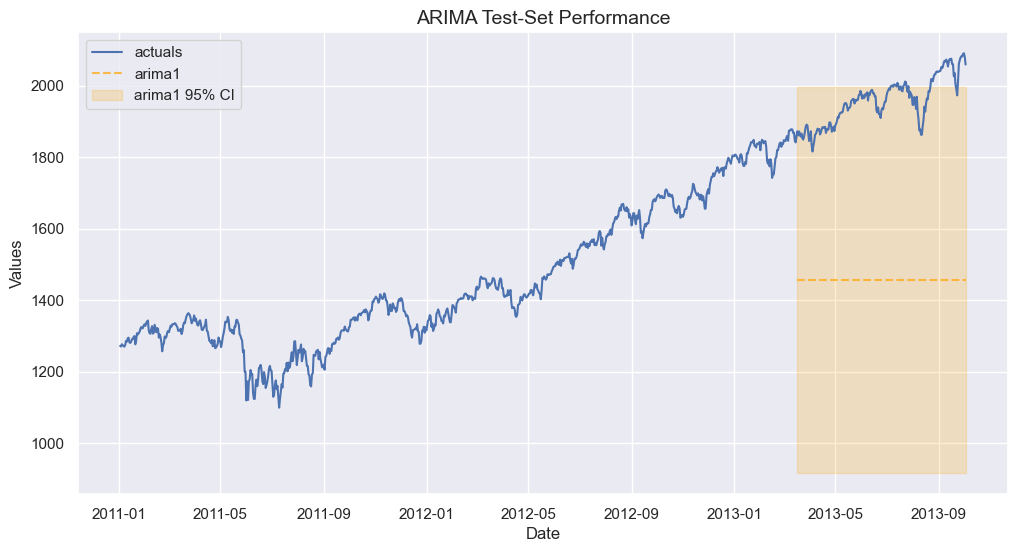

In [33]:
f.generate_future_dates(100) # 12-month forecast horizon
f.set_test_length(.2) # 20% test set
f.set_estimator('arima') # set arima
f.manual_forecast(call_me='arima1') # forecast with arima

f.plot_test_set(ci=True) # view test results
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

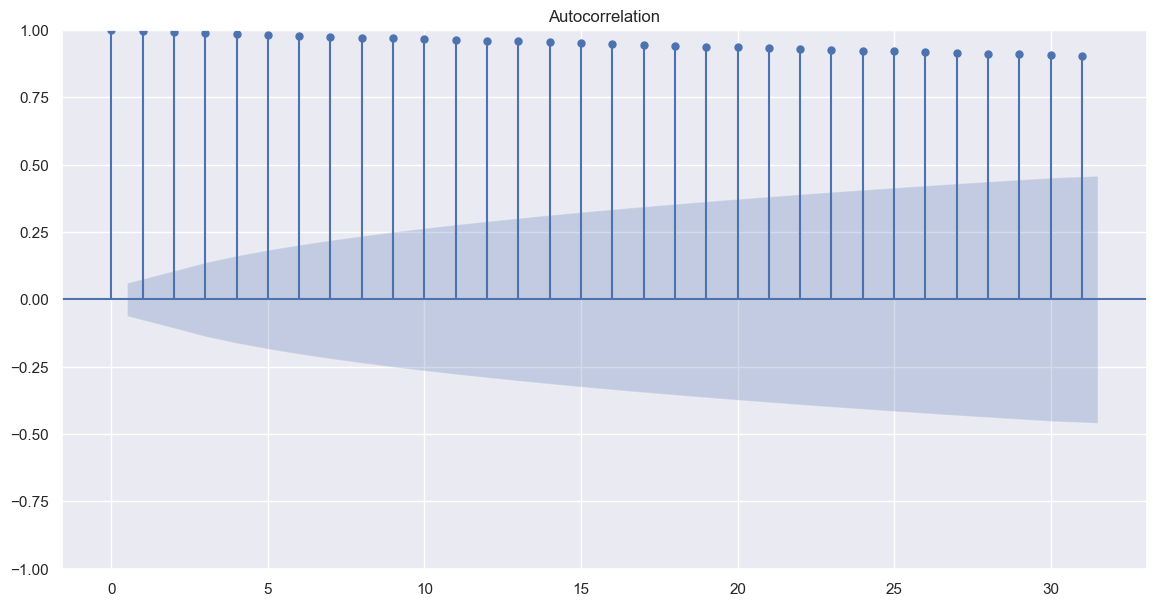

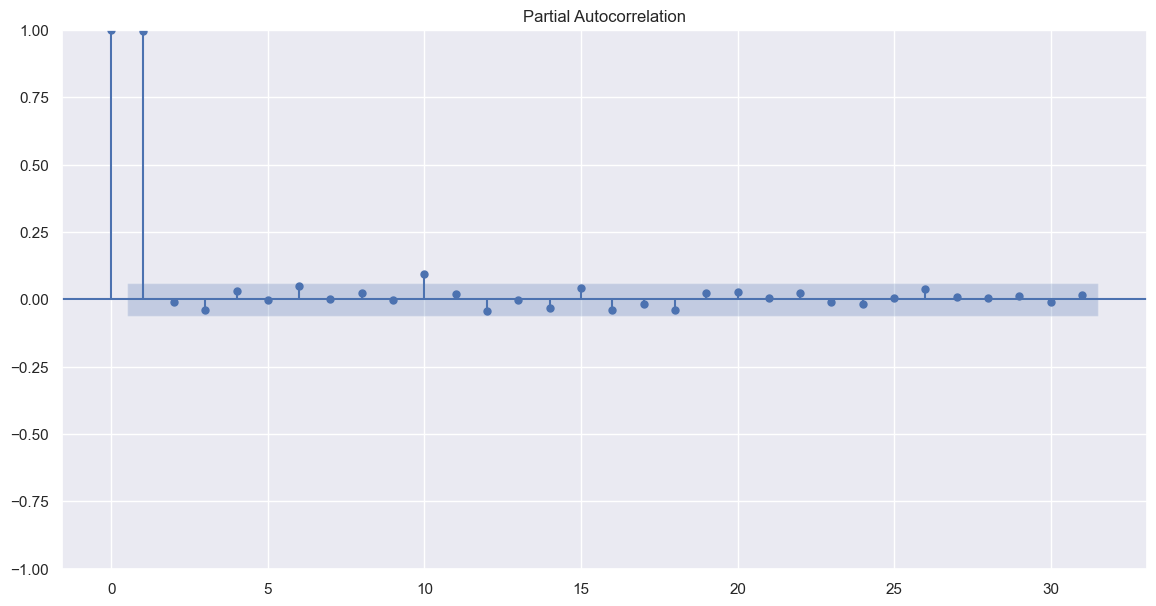

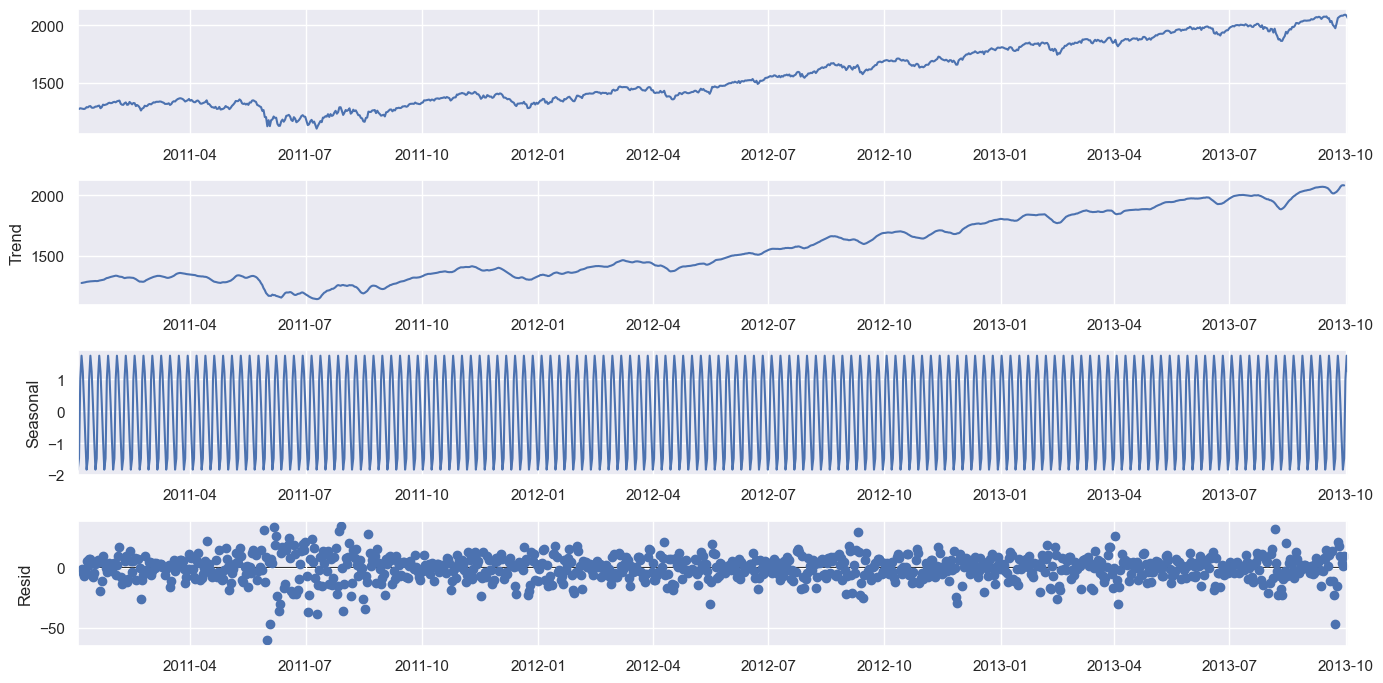

0.18205411622963572
0.9712369104017675


In [34]:
# EDA
f.plot_acf()
plt.show()
f.plot_pacf()
plt.show()
f.seasonal_decompose().plot()
plt.show()
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

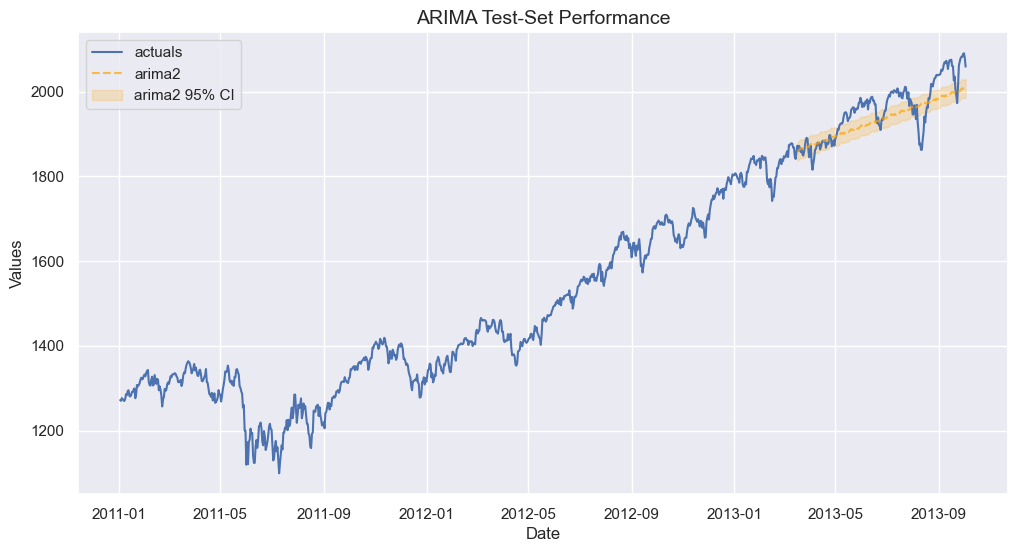

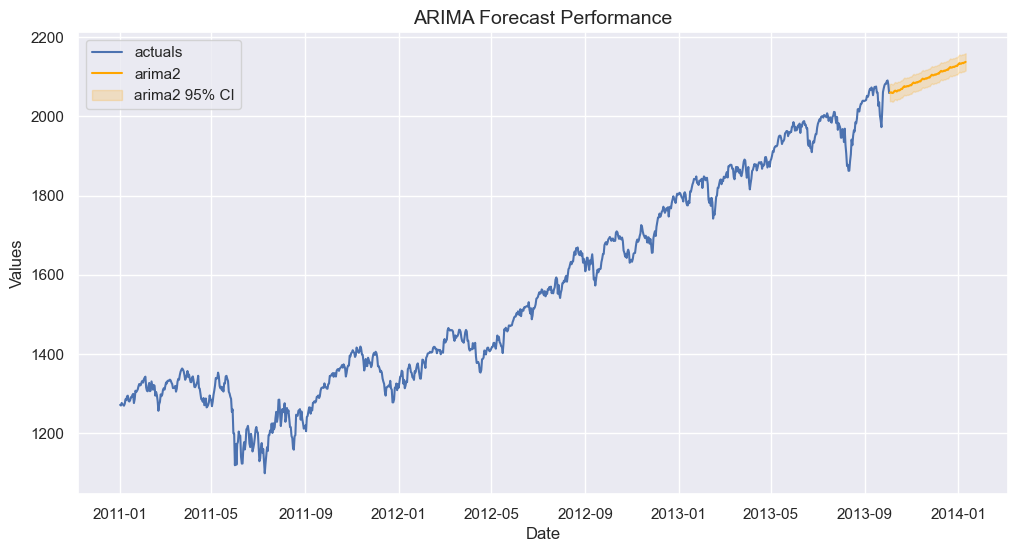

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                 1006
Model:             ARIMA(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -4031.591
Date:                          Sun, 22 Oct 2023   AIC                           8077.181
Time:                                  10:59:35   BIC                           8111.486
Sample:                                       0   HQIC                          8090.224
                                         - 1006                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8438      0.076    -11.065      0.000      -0.993      -0.694
ar.L2          0.0268      0.031      0.866      0.386      -0.034       0.088
ma.L1          0.8068      0.071     11.348      0.000       0.667       0.946
ar.S.L12      -0.0394      0.030     -1.294      0.196      -0.099       0.020
ar.S.L24       0.0138      0.034      0.407      0.684      -0.053       0.080
ma.S.L12      -0.9898      0.031    -31.577      0.000      -1.051      -0.928
sigma2       188.1133      7.582     24.810      0.000     173.253     202.974
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               197.84
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
# Forecast
f.manual_forecast(order=(2,1,1),seasonal_order=(2,1,1,12),call_me='arima2')

# View test results
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

# View forecast results
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

# See summary stats
f.regr.summary()

In [36]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [37]:
adf_test(special_data['Close'])

1. ADF :  0.18205411622963572
2. P-Value :  0.9712369104017675
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1000
5. Critical Values :
	 1% :  -3.4369061654329998
	 5% :  -2.86443457404
	 10% :  -2.568311209


In [38]:
stepwise_fit = auto_arima(special_data['Close'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1006
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -4048.690
Date:                Sun, 22 Oct 2023   AIC                           8111.379
Time:                        10:59:45   BIC                           8145.768
Sample:                    01-01-2011   HQIC                          8124.446
                         - 10-02-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1069      0.059      1.805      0.071      -0.009       0.223
ar.L1          0.1397      0.086      1.631      0.103      -0.028       0.308
ar.L2          0.7778      0.069     11.309      0.000       0.643       0.913
ar.L3         -0.0549      0.033     -1.673      0.094      -0.119       0.009
ma.L1         -0.1839      0.080     -2.295      0.022      -0.341      -0.027
ma.L2         -0.7382      0.079     -9.338      0.000      -0.893      -0.583
sigma2       184.7640      6.135     30.114      0.000     172.739     196.789
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               307.35
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                            -0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
data_len = len(special_data)

In [40]:
train_len = data_len * 0.7
test_len = data_len - train_len

In [41]:
train_data = special_data.iloc[:int(train_len)]

In [42]:
test_data = special_data.iloc[int(train_len):int(train_len + test_len)]

In [43]:
test_data.Close

new_date
2012-12-05 19:00:00    1744.66
2012-12-06 19:00:00    1754.67
2012-12-07 19:00:00    1746.38
2012-12-08 19:00:00    1752.07
2012-12-09 19:00:00    1759.77
                        ...   
2013-09-28 19:00:00    2081.88
2013-09-29 19:00:00    2088.77
2013-09-30 19:00:00    2090.57
2013-10-01 19:00:00    2080.35
2013-10-02 19:00:00    2058.90
Name: Close, Length: 302, dtype: float64

In [44]:
train_data

,Close,Open,High,Low,Change %,Timestamp,new_index
new_date,,,,,,,
2011-01-01 19:00:00,1271.87,1257.62,1276.17,1257.62,1.13%,01/03/2011,1.293883e+09
2011-01-02 19:00:00,1270.20,1272.95,1274.12,1262.66,-0.13%,01/04/2011,1.293970e+09
2011-01-03 19:00:00,1276.56,1268.78,1277.63,1265.36,0.50%,01/05/2011,1.294056e+09
2011-01-04 19:00:00,1273.85,1276.29,1278.17,1270.43,-0.21%,01/06/2011,1.294142e+09
2011-01-05 19:00:00,1271.50,1274.41,1276.83,1261.70,-0.18%,01/07/2011,1.294229e+09
...,...,...,...,...,...,...,...
2012-11-30 19:00:00,1710.14,1699.86,1711.03,1692.13,0.41%,10/14/2013,1.354277e+09
2012-12-01 19:00:00,1698.06,1709.17,1711.57,1695.93,-0.71%,10/15/2013,1.354363e+09
2012-12-02 19:00:00,1721.54,1700.49,1721.76,1700.49,1.38%,10/16/2013,1.354450e+09


In [45]:
stepwise_fit = auto_arima(train_data.Close, 
                          seasonal=True, 
                          stepwise=False, suppress_warnings=True, 
                   error_action="ignore", max_order=None, trace=True)           

stepwise_fit.summary()

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=5708.852, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=5708.431, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=5709.200, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=5705.208, Time=0.13 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=5707.002, Time=0.17 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=5696.409, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=5708.210, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=5698.241, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=5699.296, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=5698.692, Time=0.21 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=5700.658, Time=0.29 sec
 ARIMA(1,1,5)(0,0,0)[1] intercept   : AIC=5697.889, Time=0.26 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=5708.480, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=5699.426, Time=0.20 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=5699.146, Time=0.27 sec
 ARIMA(2,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  704
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -2833.248
Date:                Sun, 22 Oct 2023   AIC                           5690.497
Time:                        11:00:15   BIC                           5745.161
Sample:                    01-01-2011   HQIC                          5711.624
                         - 12-04-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9022      0.814      1.108      0.268      -0.693       2.497
ar.L1         -0.0801      0.186     -0.431      0.666      -0.444       0.284
ar.L2         -0.2037      0.153     -1.332      0.183      -0.503       0.096
ar.L3          0.2195      0.122      1.795      0.073      -0.020       0.459
ar.L4          0.0497      0.154      0.323      0.747      -0.252       0.351
ar.L5         -0.5731      0.149     -3.837      0.000      -0.866      -0.280
ma.L1          0.0301      0.204      0.147      0.883      -0.370       0.430
ma.L2          0.2473      0.156      1.587      0.113      -0.058       0.553
ma.L3         -0.3269      0.125     -2.625      0.009      -0.571      -0.083
ma.L4         -0.0149      0.165     -0.091      0.928      -0.338       0.308
ma.L5          0.4287      0.159      2.696      0.007       0.117       0.740
sigma2       185.4812      7.760     23.904      0.000     170.273     200.690
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               202.43
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                            -0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

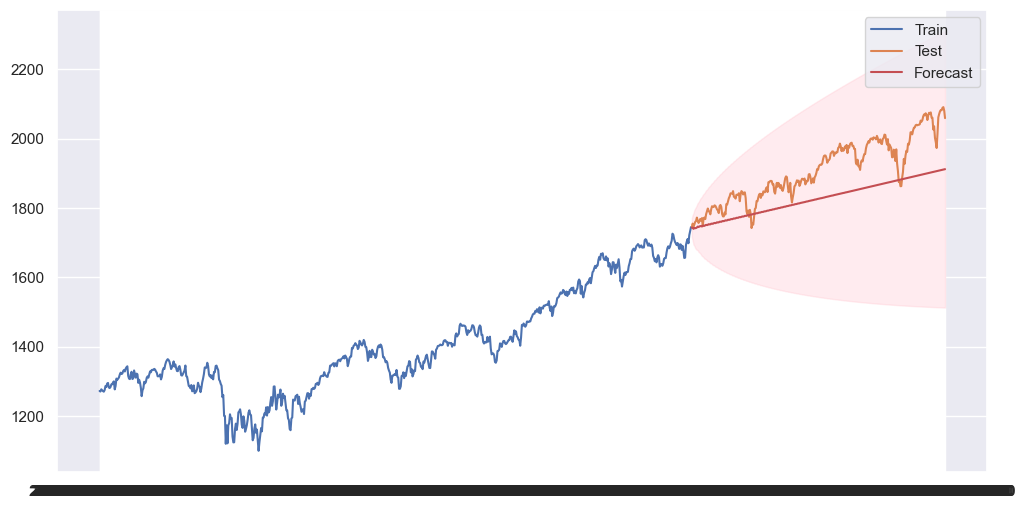

In [46]:
# Обучение модели с найденными оптимальными параметрами
stepwise_fit.fit(train_data.Close)

# Прогнозирование на тестовом наборе данных
forecast, conf_int = stepwise_fit.predict(n_periods=len(test_data), 
                                          return_conf_int=True)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data.Close, label='Train')
plt.plot(test_data.index, test_data.Close, label='Test')
plt.plot(test_data.index, forecast, label='Forecast', color='r')
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

In [47]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(train_data.Close, order=(2, 1, 2))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  704
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2845.117
Date:                Sun, 22 Oct 2023   AIC                           5700.233
Time:                        11:01:13   BIC                           5723.010
Sample:                    01-01-2011   HQIC                          5709.036
                         - 12-04-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0084      0.131      0.064      0.949      -0.248       0.264
ar.L2          0.7934      0.109      7.263      0.000       0.579       1.007
ma.L1         -0.0949      0.128     -0.740      0.460      -0.346       0.157
ma.L2         -0.7553      0.100     -7.532      0.000      -0.952      -0.559
sigma2       191.7637      7.435     25.791      0.000     177.191     206.337
===================================================================================
Ljung-Box (L1) (Q):                   1.10   Jarque-Bera (JB):               242.47
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0, 0.5, 'Price')

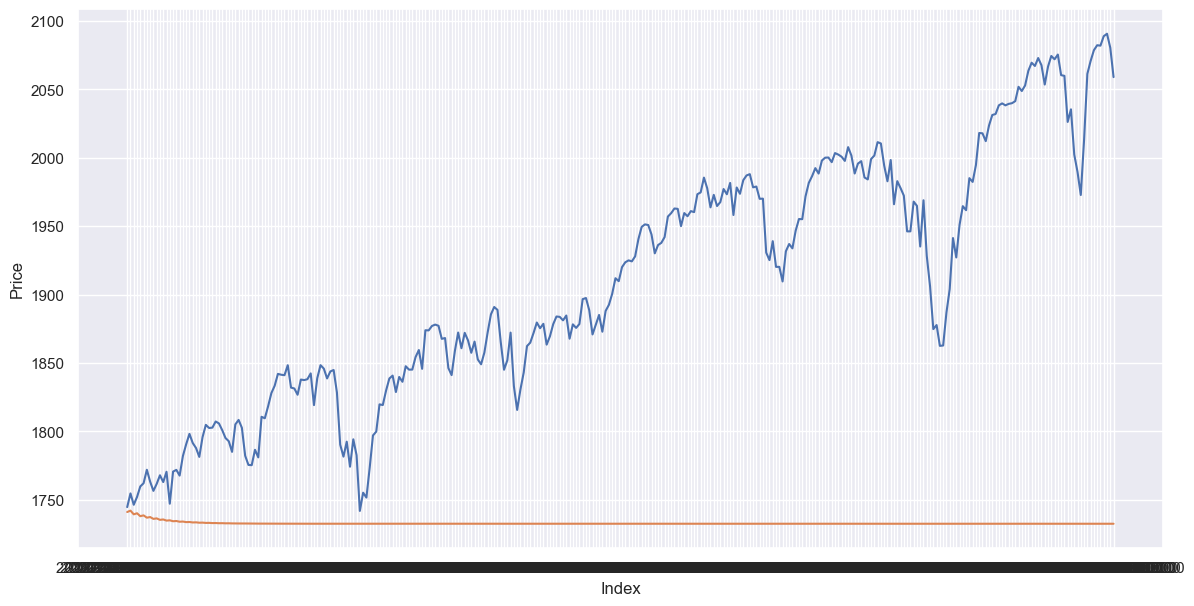

In [48]:
start=test_data.index[0]
end=test_data.index[len(test_data)-1]
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred = model.predict(start = start,end = end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, pred)
plt.xlabel('Index')
plt.ylabel('Price')

In [49]:
pred

2012-12-05 19:00:00    1741.082413
2012-12-06 19:00:00    1742.093812
2012-12-07 19:00:00    1739.390847
2012-12-08 19:00:00    1740.170614
2012-12-09 19:00:00    1738.032673
                          ...     
2013-09-28 19:00:00    1732.506669
2013-09-29 19:00:00    1732.506669
2013-09-30 19:00:00    1732.506669
2013-10-01 19:00:00    1732.506669
2013-10-02 19:00:00    1732.506669
Freq: D, Name: ARIMA predictions, Length: 302, dtype: float64

In [50]:
test = list()
temper = pd.DataFrame(train_data.Close)
for i in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(temper, order=(2, 1, 2))
    model = model.fit()
    start=test_data.index[i]
    end=test_data.index[len(test_data)-1]
    #if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
    #index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
    pred = model.predict(start = start,end = end,typ='levels').rename('ARIMA predictions')
    temper.loc[start] = pred[0]
    test.append(pred[0])

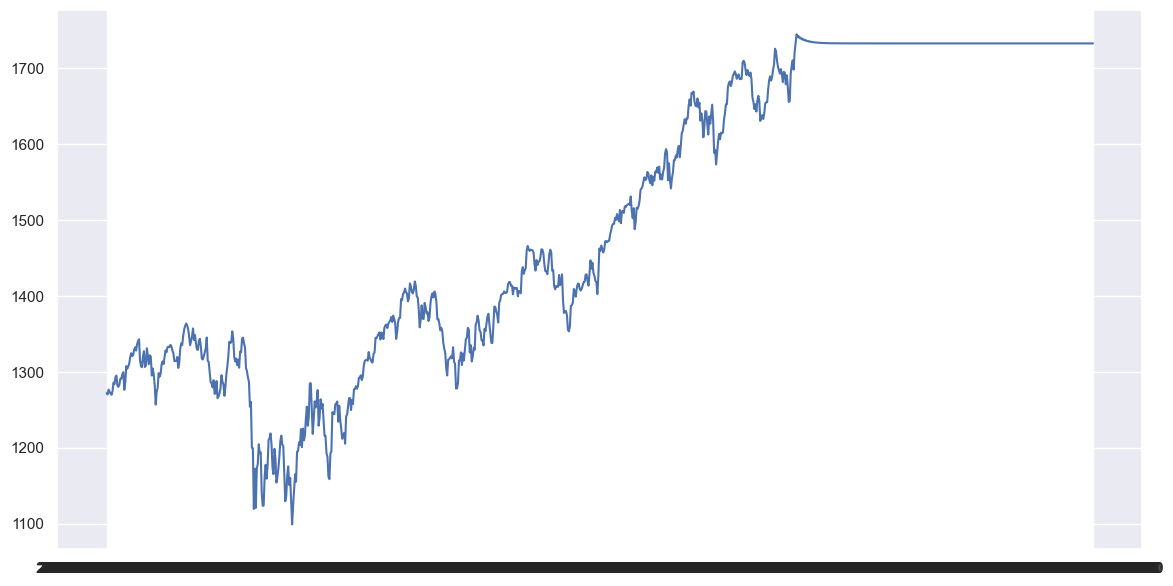

In [51]:
plt.plot(temper)

In [52]:
temper

,Close
new_date,
2011-01-01 19:00:00,1271.870000
2011-01-02 19:00:00,1270.200000
2011-01-03 19:00:00,1276.560000
2011-01-04 19:00:00,1273.850000
2011-01-05 19:00:00,1271.500000
...,...
2013-09-28 19:00:00,1732.505473
2013-09-29 19:00:00,1732.505473
2013-09-30 19:00:00,1732.505473


In [53]:
test

[1741.0824126864848,
 1742.0937845466763,
 1739.3910209266562,
 1740.171745792974,
 1738.0339111266053,
 1738.6357215675152,
 1736.9446195204475,
 1737.4061981410287,
 1736.0683862862513,
 1736.4236943733165,
 1735.3651310890687,
 1735.6381175751233,
 1734.8006151610432,
 1735.0096308708228,
 1734.3468958649523,
 1734.5070992346698,
 1733.9827092452003,
 1734.1057155678423,
 1733.6906777165948,
 1733.784730654023,
 1733.4561989629503,
 1733.5280200306745,
 1733.2679252398473,
 1733.3226904578642,
 1733.1167380208753,
 1733.1584297464,
 1732.9954486475544,
 1733.027218054461,
 1732.8981682410015,
 1732.922288409654,
 1732.8201023225022,
 1732.8386649712406,
 1732.7579224046644,
 1732.7719883777045,
 1732.7080474994755,
 1732.718685603917,
 1732.6680236228428,
 1732.676026853662,
 1732.6359053070546,
 1732.6419358131757,
 1732.6101640812108,
 1732.614702091241,
 1732.589546300283,
 1732.5929574439078,
 1732.573043188055,
 1732.5756033306336,
 1732.559839451995,
 1732.5617538122763,
 1732

In [54]:
test_data

,Close,Open,High,Low,Change %,Timestamp,new_index
new_date,,,,,,,
2012-12-05 19:00:00,1744.66,1745.20,1747.79,1740.67,0.01%,10/21/2013,1.354709e+09
2012-12-06 19:00:00,1754.67,1746.48,1759.33,1746.48,0.57%,10/22/2013,1.354795e+09
2012-12-07 19:00:00,1746.38,1752.27,1752.27,1740.50,-0.47%,10/23/2013,1.354882e+09
2012-12-08 19:00:00,1752.07,1747.48,1753.94,1745.50,0.33%,10/24/2013,1.354968e+09
2012-12-09 19:00:00,1759.77,1756.01,1759.82,1752.45,0.44%,10/25/2013,1.355054e+09
...,...,...,...,...,...,...,...
2013-09-28 19:00:00,2081.88,2083.25,2087.56,2081.86,-0.01%,12/24/2014,1.380370e+09
2013-09-29 19:00:00,2088.77,2084.30,2092.70,2084.30,0.33%,12/26/2014,1.380456e+09
2013-09-30 19:00:00,2090.57,2087.63,2093.55,2085.75,0.09%,12/29/2014,1.380542e+09


Performing stepwise search to minimize aic
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=6496.540, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6503.732, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6503.464, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6503.753, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6503.985, Time=0.01 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=6494.622, Time=0.56 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=6494.824, Time=0.19 sec
 ARIMA(2,1,1)(0,0,2)[12] intercept   : AIC=6496.507, Time=1.59 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=6494.578, Time=0.53 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=6496.521, Time=1.62 sec
 ARIMA(2,1,1)(2,0,1)[12] intercept   : AIC=6498.521, Time=2.40 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=6492.987, Time=0.42 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=6493.217, Time=0.14 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=6494.950, Time=1.16 sec
 ARIMA(1,1,1)(1,0,1

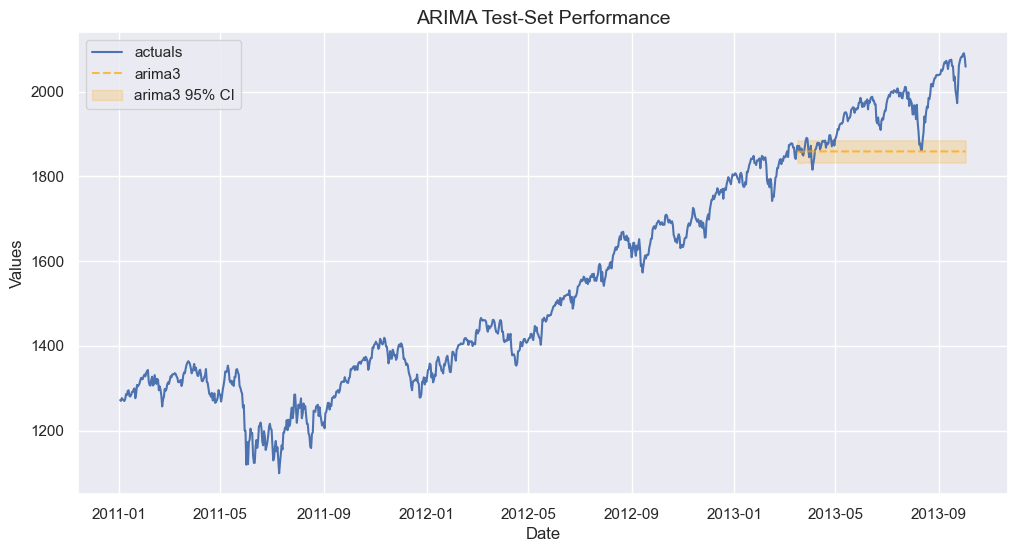

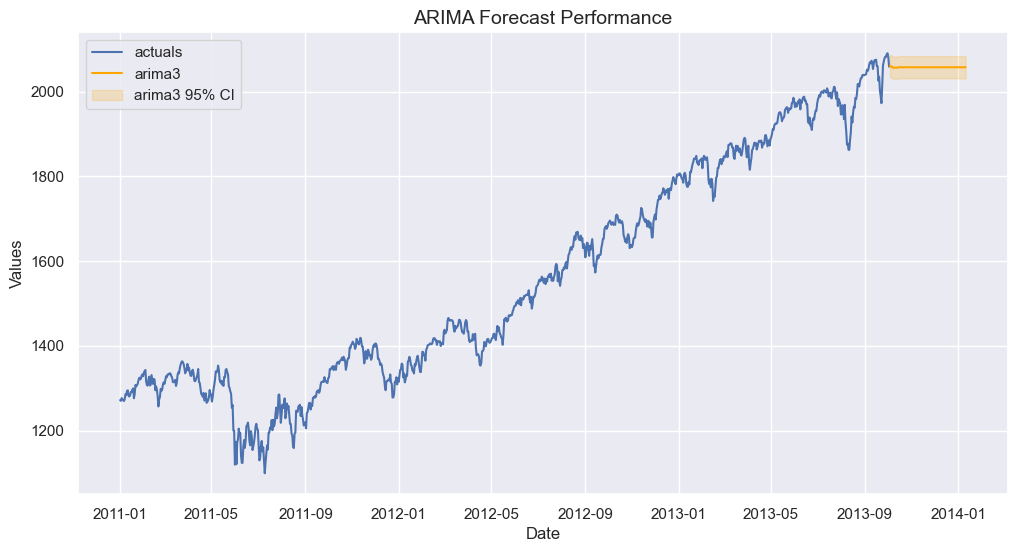

In [55]:
from scalecast.auxmodels import auto_arima

auto_arima(
    f,
    start_P=1,
    start_q=1,
    max_p=6,
    max_q=6,
    m=12,
    seasonal=True,
    max_P=2, 
    max_D=2,
    max_Q=2,
    max_d=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    information_criterion="aic",
    alpha=0.05,
    scoring='mse',
    call_me='arima3',
)

f.plot_test_set(ci=True,models='arima3')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=True,models='arima3')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [56]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1006
Model:             ARIMA(1, 1, 1)x(1, 0, [], 12)   Log Likelihood               -4053.710
Date:                           Sun, 22 Oct 2023   AIC                           8115.421
Time:                                   11:02:20   BIC                           8135.072
Sample:                                        0   HQIC                          8122.888
                                          - 1006                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8922      0.048    -18.414      0.000      -0.987      -0.797
ma.L1          0.8374      0.058     14.486      0.000       0.724       0.951
ar.S.L12      -0.0390      0.028     -1.393      0.164      -0.094       0.016
sigma2       186.6354      5.968     31.274      0.000     174.939     198.332
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):               244.30
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

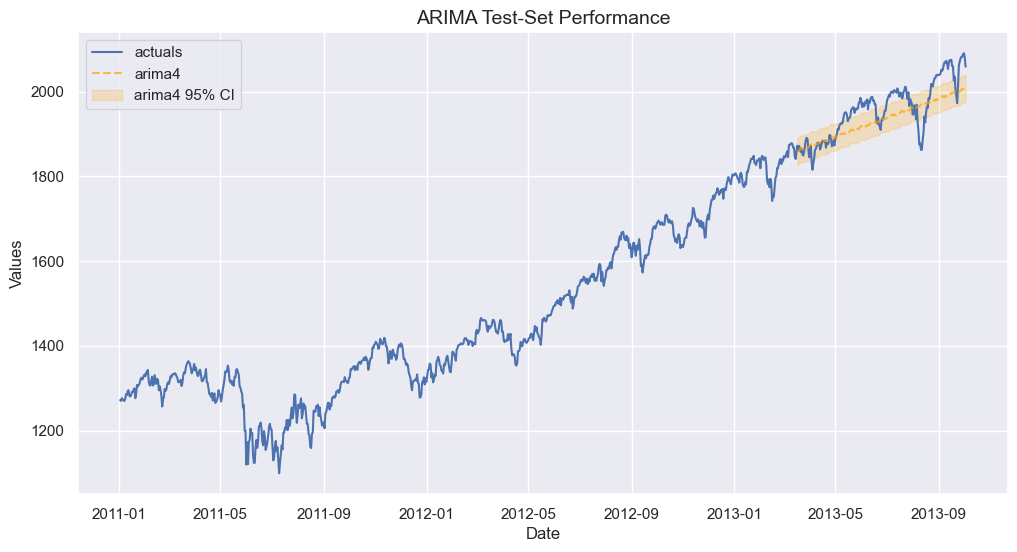

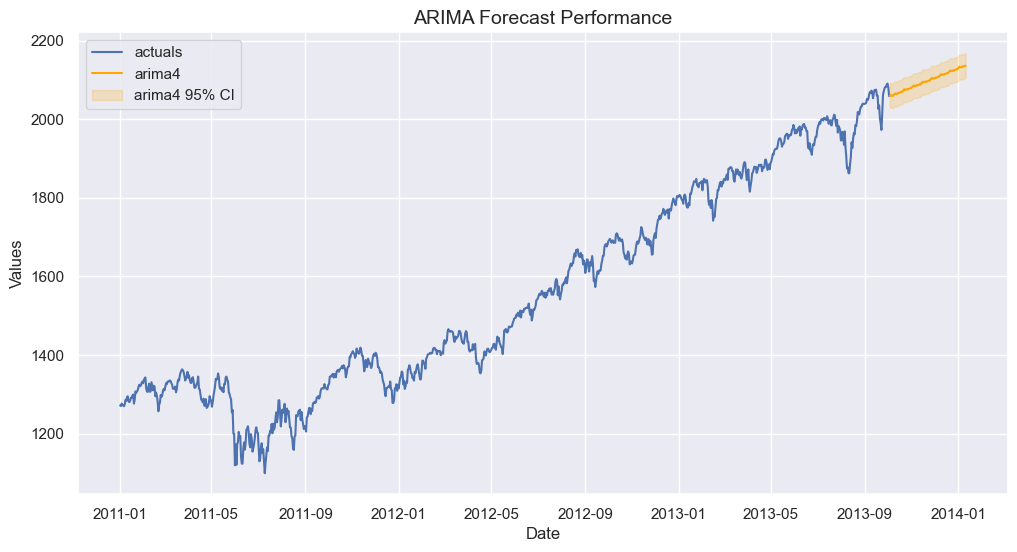

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                 1006
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4031.946
Date:                          Sun, 22 Oct 2023   AIC                           8073.892
Time:                                  11:02:38   BIC                           8098.395
Sample:                                       0   HQIC                          8083.208
                                         - 1006                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8897      0.052    -17.121      0.000      -0.992      -0.788
ma.L1          0.8341      0.061     13.645      0.000       0.714       0.954
ar.S.L12      -0.0400      0.030     -1.328      0.184      -0.099       0.019
ma.S.L12      -0.9935      0.045    -22.176      0.000      -1.081      -0.906
sigma2       187.6731      9.074     20.682      0.000     169.888     205.458
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):               209.09
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
f.set_validation_length(12)
grid = {
    'order':[(1,1,1),(1,1,0),(0,1,1)],
    'seasonal_order':[(2,1,1,12),(1,1,1,12),(2,1,0,12),(0,1,0,12)]
}

f.ingest_grid(grid)
f.tune()
f.auto_forecast(call_me='arima4')

f.plot_test_set(ci=True,models='arima4')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=True,models='arima4')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

f.regr.summary()

In [58]:
pd.options.display.max_colwidth = 100
results = f.export(to_excel=True,
                   excel_name='arima_results.xlsx',
                   determine_best_by='TestSetMAPE')

In [59]:
summaries = results['model_summaries']
summaries[
    [
         'ModelNickname',
         'HyperParams',
         'InSampleMAPE',
         'TestSetMAPE'
    ]
]

,ModelNickname,HyperParams,InSampleMAPE,TestSetMAPE
0,arima2,"{'order': (2, 1, 1), 'seasonal_order': (2, 1, 1, 12)}",0.008438,0.018521
1,arima4,"{'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 12)}",0.008442,0.018761
2,arima3,"{'order': (1, 1, 1), 'seasonal_order': (1, 0, 0, 12), 'trend': None}",0.007749,0.050006
3,arima1,{},0.154197,0.255411
